### This optimized version contains removing outliers as done on reference below:
https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#notebook-container

## Import Necessary Libraries

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [90]:
df = pd.read_csv('creditcard.csv')

## Scaling

In [91]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = StandardScaler()
rc = RobustScaler()

df['scaled_amount'] = rc.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rc.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

## Examine Fraudulent Transactions

In [92]:
print('Non Frauds: ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds: ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Frauds:  99.83 % of the dataset
Frauds:  0.17 % of the dataset


## Balance Dataset

In [93]:
# Shuffle dataset to implement random undersampling 
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]   # 492 amount of fraud transaction 
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
random_undersample_df = normal_distributed_df.sample(frac=1, random_state=42)


## Correlation Plotting

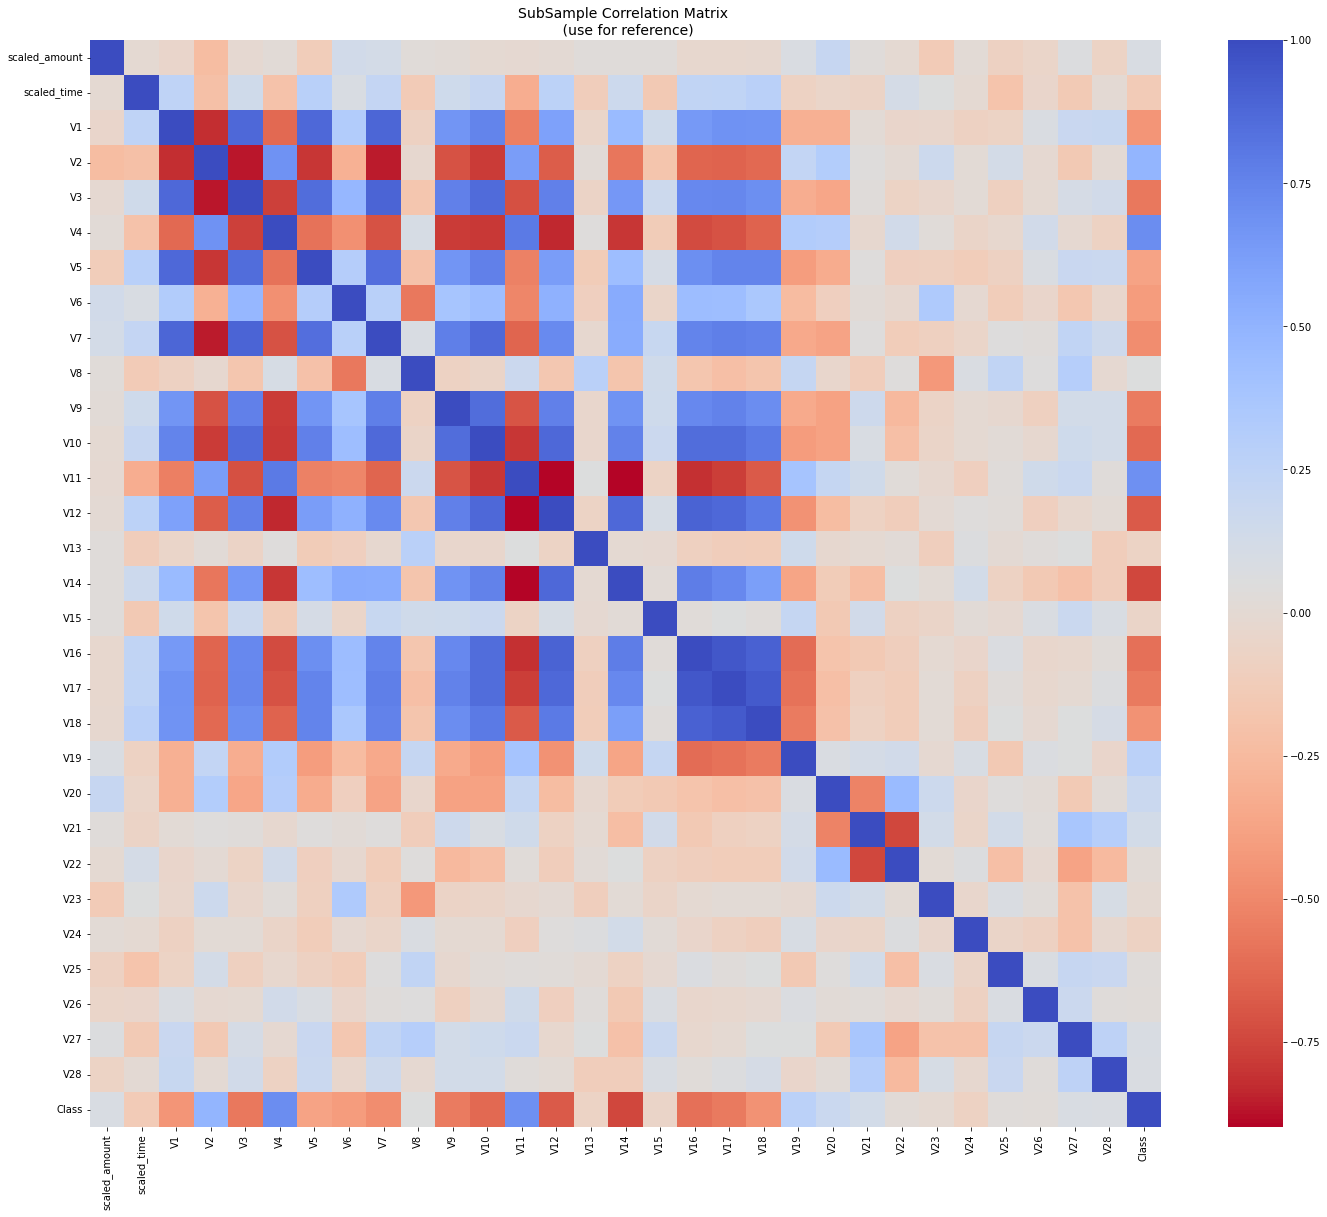

In [94]:
# Credit to Janio Martinez Bachmann

# In this cell, feature correlations with the target variable (Class column) is plotted with a heatmap
# This is done to detemine the features with the most influence towards the Class of a transaction.
from seaborn import heatmap

f, (ax2) = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = random_undersample_df.corr()
heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

## Removing Outliers

In [95]:
# Credit to Janio Martinez Bachmann

# In this cell, outliers from features with the highest correlation (in this case, V14, V12, and V10) 
# are dropped using the IQR method and boxplot visualization.

# Outliers are defined as data with values above the upper threshold and below the lower threshold.
# Thresholds are determined from the IQR (Interquartile Range) value, that is the range between the 75th and 25th percentile.
# Mathematically, thresholds are Q1 + 1.5 * IQR for the upper threshold and Q1 - 1.5 * IQR for the lower threshold.

import numpy as np

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = random_undersample_df['V14'].loc[random_undersample_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

random_undersample_df = random_undersample_df.drop(random_undersample_df[(random_undersample_df['V14'] > v14_upper) | (random_undersample_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = random_undersample_df['V12'].loc[random_undersample_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
random_undersample_df = random_undersample_df.drop(random_undersample_df[(random_undersample_df['V12'] > v12_upper) | (random_undersample_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(random_undersample_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = random_undersample_df['V10'].loc[random_undersample_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
random_undersample_df = random_undersample_df.drop(random_undersample_df[(random_undersample_df['V10'] > v10_upper) | (random_undersample_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(random_undersample_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.0499976898594, -18.8220867423816, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.4311310279993, -18.6837146333443, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.2399619587112, -16.649628

## Implement Random Undersampling

In [96]:
from sklearn.model_selection import train_test_split
from copy import deepcopy

X = random_undersample_df.drop('Class', axis=1)
y = random_undersample_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn to arrays to feed on classifier (Random Forest Algorithm)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train2 = deepcopy(X_train)
X_test2 = deepcopy(X_test)
y_train2 = deepcopy(y_train)
y_test2 = deepcopy(y_test)

## Get The Best Parameters For Random Forest Classifier

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

## Train the Random Forest Model on the Training Set

In [98]:
rf_classifier = RandomForestClassifier(**best_params)
rf_classifier.fit(X_train,y_train)

y_pred = rf_classifier.predict(X_test)

## Evaluate the Model's Performance 

In [99]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef

acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
mcc =matthews_corrcoef(y_test,y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Matthews correlation coefficient: {mcc}")


Accuracy: 0.968421052631579
Precision: 0.9885057471264368
Recall: 0.945054945054945
F1-Score: 0.9662921348314606
Matthews correlation coefficient: 0.9374546520515875


## Compare to Single Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier 
 
# Define hyperparameter grid 
tree_params = {"criterion": ["gini", "entropy"], 
"max_depth": list(range(2,4,1)),  
"min_samples_leaf": list(range(5,7,1))} 
 
grid_tree = GridSearchCV(DecisionTreeClassifier(), 
tree_params) 
grid_tree.fit(X_train2, y_train2) 
 
# Get the best parameters for the balanced dataset 
tree_clf = grid_tree.best_estimator_ 
 
# Train balanced dataset with Decision Tree Model 
dt_classifier = tree_clf 
dt_classifier.fit(X_train2,y_train2) 
 
# New prediction 
new_y_pred = dt_classifier.predict(X_test2) 
 
# Verdict 
acc = accuracy_score(y_test2,new_y_pred) 
precision = precision_score(y_test2,new_y_pred) 
recall = recall_score(y_test2,new_y_pred) 
f1 = f1_score(y_test2,new_y_pred) 
mcc =matthews_corrcoef(y_test2,new_y_pred) 
 
print(f"Accuracy: {acc}") 
print(f"Precision: {precision}") 
print(f"Recall: {recall}") 
print(f"F1-Score: {f1}") 
print(f"Matthews correlation coefficient: {mcc}")

Accuracy: 0.9526315789473684
Precision: 0.9555555555555556
Recall: 0.945054945054945
F1-Score: 0.9502762430939227
Matthews correlation coefficient: 0.9051031170783723


## The Confusion Matrix

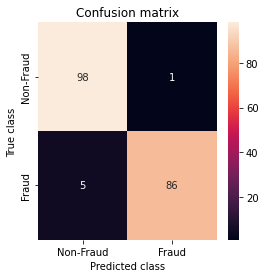

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
LABELS = ['Non-Fraud', 'Fraud']
confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mtx, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig("confusion_matrix")
plt.show()